In [33]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
!pip install tensorflow

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
from tensorflow.keras.preprocessing.image import load_img 

In [37]:
ls

07-augmentations.ipynb                    FUTChampions/
07-neural-nets-test.ipynb                 home_work8.ipynb
07-neural-nets-train.ipynb                Homework9.ipynb
0fc2966d-9d51-466a-abc0-bbee581045d3.jpg  kitchenware-classification/
clothing-model-v4.h5                      kitchenware-classification.ipynb
core.172                                  kitchenware-test.ipynb
dataset_generator.ipynb                   note.py
deployment/                               tensorflowsave.ipynb
dino_dragon_10_0.899.h5                   xception_v2_0_0_01_0.840.h5
dino-dragon.tflite                        xception_v2_0_0_02_0.848.h5
Dino-or-Dragon/                           xception_v4_large_15_0.950.h5
FuelConsumption/


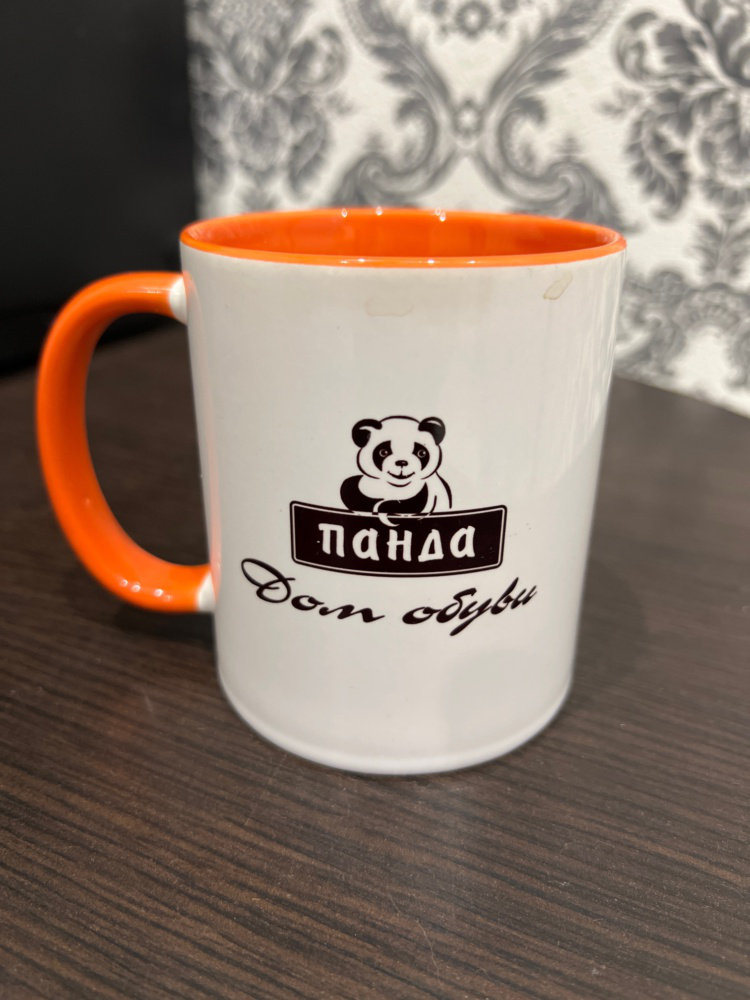

In [38]:
path = './kitchenware-classification/kitchenware-classification/images'
name = '0000.jpg'
fullname = path + '/' + name
load_img(fullname)

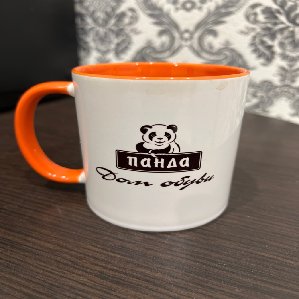

In [39]:
load_img(fullname, target_size=(299, 299))

In [40]:
img = load_img(fullname, target_size=(150, 150))

In [41]:
x = np.array(img)

In [42]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [43]:
model = Xception(
    weights='imagenet',
    input_shape=(299, 299, 3)
)

In [44]:
img = load_img(fullname, target_size=(299, 299))
x = np.array(img)
x.shape

(299, 299, 3)

In [45]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [46]:
X = preprocess_input(X)

In [47]:
pred = model.predict(X)

1/1 [==============================] - 1s 761ms/step


In [48]:
pred.shape

(1, 1000)

In [49]:
pred[0, :10]

array([1.30782952e-04, 1.09693399e-04, 1.19097858e-04, 1.30851826e-04,
       1.91480794e-04, 9.68424065e-05, 1.26275845e-04, 4.74724475e-05,
       1.02495906e-04, 1.79825031e-04], dtype=float32)

In [50]:
decode_predictions(pred)

[[('n03063599', 'coffee_mug', 0.66249776),
  ('n07930864', 'cup', 0.111484446),
  ('n07920052', 'espresso', 0.043691777),
  ('n07932039', 'eggnog', 0.007362592),
  ('n03063689', 'coffeepot', 0.005290692)]]

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [52]:
image_size = (150, 150)
batch_size = 32

In [53]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/training",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 515 images belonging to 6 classes.


In [54]:
train_ds.class_indices

{'cups': 0, 'forks': 1, 'glasses': 2, 'knives': 3, 'plates': 4, 'spoons': 5}

In [55]:
X,y = next(train_ds)

In [56]:
X

array([[[[ 0.39607847,  0.15294123, -0.0745098 ],
         [ 0.39607847,  0.15294123, -0.0745098 ],
         [ 0.38823533,  0.14509809, -0.08235294],
         ...,
         [ 0.33333337,  0.07450986, -0.16862744],
         [ 0.3176471 ,  0.05098045, -0.16862744],
         [ 0.30980396,  0.05098045, -0.09803921]],

        [[ 0.37254906,  0.12941182, -0.11372548],
         [ 0.39607847,  0.15294123, -0.0745098 ],
         [ 0.38823533,  0.13725495, -0.05882353],
         ...,
         [ 0.30980396,  0.05882359, -0.12156862],
         [ 0.3176471 ,  0.06666672, -0.11372548],
         [ 0.3176471 ,  0.05098045, -0.14509803]],

        [[ 0.3803922 ,  0.14509809, -0.04313725],
         [ 0.41176474,  0.16078436, -0.01960784],
         [ 0.38823533,  0.13725495, -0.05882353],
         ...,
         [ 0.3176471 ,  0.06666672, -0.11372548],
         [ 0.2941177 ,  0.05098045, -0.17647058],
         [ 0.32549024,  0.07450986, -0.12156862]],

        ...,

        [[-0.4352941 , -0.7490196 , -0

In [57]:
X.shape

(32, 150, 150, 3)

In [58]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 761 images belonging to 6 classes.


In [59]:
base_model = Xception(
    weights='imagenet',
    input_shape=(150, 150, 3),
    include_top=False #leave out dense layers
)

base_model.trainable = False

In [60]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)
vector = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(6)(vector)

model = keras.Model(inputs, outputs)

In [61]:
learning_rate = 0.01

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [62]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
17/17 [==============================] - 45s 3s/step - loss: 1.1904 - accuracy: 0.6524 - val_loss: 0.6539 - val_accuracy: 0.8384
Epoch 2/10
17/17 [==============================] - 42s 3s/step - loss: 0.3506 - accuracy: 0.8913 - val_loss: 0.5824 - val_accuracy: 0.8607
Epoch 3/10
17/17 [==============================] - 42s 3s/step - loss: 0.1118 - accuracy: 0.9650 - val_loss: 0.8878 - val_accuracy: 0.8134
Epoch 4/10
17/17 [==============================] - 42s 3s/step - loss: 0.0592 - accuracy: 0.9864 - val_loss: 0.5858 - val_accuracy: 0.8778
Epoch 5/10
17/17 [==============================] - 42s 3s/step - loss: 0.0329 - accuracy: 0.9864 - val_loss: 0.6553 - val_accuracy: 0.8752
Epoch 6/10
17/17 [==============================] - 42s 3s/step - loss: 0.0225 - accuracy: 0.9942 - val_loss: 0.6450 - val_accuracy: 0.8686
Epoch 7/10
17/17 [==============================] - 43s 3s/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.6133 - val_accuracy: 0.8870
Epoch 8/10
17/17 [==

In [63]:
def make_model(learning_rate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(6)(vector)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [64]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0_001 = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=callbacks)

Epoch 1/10
17/17 [==============================] - 42s 3s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5961 - val_accuracy: 0.8817
Epoch 2/10
17/17 [==============================] - 42s 3s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.5950 - val_accuracy: 0.8857
Epoch 3/10
17/17 [==============================] - 41s 3s/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.5896 - val_accuracy: 0.8817
Epoch 4/10
17/17 [==============================] - 42s 3s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.5780 - val_accuracy: 0.8804
Epoch 5/10
17/17 [==============================] - 42s 3s/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5770 - val_accuracy: 0.8804
Epoch 6/10
17/17 [==============================] - 42s 3s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5822 - val_accuracy: 0.8830
Epoch 7/10
17/17 [==============================] - 42s 3s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5883 - val_accuracy: 0.8830
Epoch 8/10
17/17 [==

In [65]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(150, 150, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    
    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [66]:
model = make_model(learning_rate=0.001, droprate=0.0)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_0_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_0 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
17/17 [==============================] - 46s 3s/step - loss: 0.9302 - accuracy: 0.6816 - val_loss: 0.4035 - val_accuracy: 0.8528
Epoch 2/30
17/17 [==============================] - 42s 3s/step - loss: 0.2574 - accuracy: 0.9204 - val_loss: 0.3925 - val_accuracy: 0.8673
Epoch 3/30
17/17 [==============================] - 42s 3s/step - loss: 0.1403 - accuracy: 0.9592 - val_loss: 0.3923 - val_accuracy: 0.8725
Epoch 4/30
17/17 [==============================] - 42s 3s/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.3608 - val_accuracy: 0.8896
Epoch 8/30
17/17 [==============================] - 43s 3s/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.3717 - val_accuracy: 0.8922
Epoch 9/30
17/17 [==============================] - 42s 3s/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.3705 - val_accuracy: 0.8909
Epoch 10/30
17/17 [==============================] - 42s 3s/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 0.3843 - val_accuracy: 0.8870
Epoch 11/30
17/17 [

In [67]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_2_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_1 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
17/17 [==============================] - 45s 3s/step - loss: 0.8788 - accuracy: 0.6699 - val_loss: 0.4914 - val_accuracy: 0.8160
Epoch 2/30
17/17 [==============================] - 42s 3s/step - loss: 0.3261 - accuracy: 0.8951 - val_loss: 0.5013 - val_accuracy: 0.8187
Epoch 3/30
17/17 [==============================] - 42s 3s/step - loss: 0.2275 - accuracy: 0.9223 - val_loss: 0.3540 - val_accuracy: 0.8791
Epoch 4/30
17/17 [==============================] - 42s 3s/step - loss: 0.1312 - accuracy: 0.9573 - val_loss: 0.3880 - val_accuracy: 0.8778
Epoch 5/30
17/17 [==============================] - 41s 3s/step - loss: 0.0867 - accuracy: 0.9786 - val_loss: 0.3596 - val_accuracy: 0.8752
Epoch 6/30
17/17 [==============================] - 42s 3s/step - loss: 0.0489 - accuracy: 0.9922 - val_loss: 0.3582 - val_accuracy: 0.8804
Epoch 7/30
17/17 [==============================] - 42s 3s/step - loss: 0.0500 - accuracy: 0.9864 - val_loss: 0.3477 - val_accuracy: 0.8870
Epoch 8/30
17/17 [==

In [68]:
model = make_model(learning_rate=0.001, droprate=0.5)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v2_0_5_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_2 = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=callbacks)

Epoch 1/30
17/17 [==============================] - 45s 3s/step - loss: 1.1353 - accuracy: 0.5845 - val_loss: 0.4885 - val_accuracy: 0.8568
Epoch 2/30
17/17 [==============================] - 42s 3s/step - loss: 0.5273 - accuracy: 0.8117 - val_loss: 0.4062 - val_accuracy: 0.8476
Epoch 3/30
17/17 [==============================] - 42s 3s/step - loss: 0.3555 - accuracy: 0.8816 - val_loss: 0.3833 - val_accuracy: 0.8528
Epoch 4/30
17/17 [==============================] - 42s 3s/step - loss: 0.2483 - accuracy: 0.9184 - val_loss: 0.3281 - val_accuracy: 0.8896
Epoch 5/30
17/17 [==============================] - 42s 3s/step - loss: 0.2285 - accuracy: 0.9204 - val_loss: 0.3215 - val_accuracy: 0.8883
Epoch 6/30
17/17 [==============================] - 42s 3s/step - loss: 0.1857 - accuracy: 0.9320 - val_loss: 0.3323 - val_accuracy: 0.8817
Epoch 7/30
17/17 [==============================] - 42s 3s/step - loss: 0.1618 - accuracy: 0.9379 - val_loss: 0.3520 - val_accuracy: 0.8844
Epoch 8/30
17/17 [==

In [69]:
epochs = history_0.epoch

train00 = history_0.history['accuracy']
train02 = history_1.history['accuracy']
train05 = history_2.history['accuracy']


val00 = history_0.history['val_accuracy']
val02 = history_1.history['val_accuracy']
val05 = history_2.history['val_accuracy']


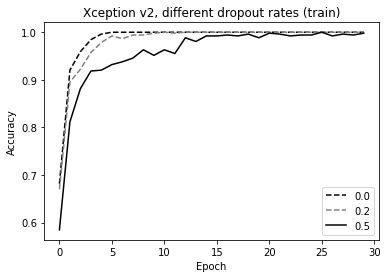

In [70]:
plt.figure(figsize=(6, 4))

plt.plot(epochs, train00, color='black', linestyle='dashed', label='0.0')
plt.plot(epochs, train02, color='grey', linestyle='dashed', label='0.2')
plt.plot(epochs, train05, color='black', linestyle='solid', label='0.5')


plt.title('Xception v2, different dropout rates (train)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')


plt.legend()

plt.savefig('xception_v2_dropout_train.svg')

plt.show()

In [71]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 761 images belonging to 6 classes.


In [72]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True, vertical_flip=True  
)

train_ds = train_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/training",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 515 images belonging to 6 classes.


In [73]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v3_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, callbacks=callbacks)

Epoch 1/50
17/17 [==============================] - 46s 3s/step - loss: 1.1215 - accuracy: 0.5942 - val_loss: 0.5310 - val_accuracy: 0.8173
Epoch 2/50
17/17 [==============================] - 43s 3s/step - loss: 0.5492 - accuracy: 0.8136 - val_loss: 0.3333 - val_accuracy: 0.8922
Epoch 3/50
17/17 [==============================] - 43s 3s/step - loss: 0.4486 - accuracy: 0.8447 - val_loss: 0.4410 - val_accuracy: 0.8331
Epoch 4/50
17/17 [==============================] - 43s 3s/step - loss: 0.3784 - accuracy: 0.8718 - val_loss: 0.3832 - val_accuracy: 0.8541
Epoch 5/50
17/17 [==============================] - 43s 3s/step - loss: 0.3127 - accuracy: 0.9010 - val_loss: 0.2993 - val_accuracy: 0.9041
Epoch 6/50
17/17 [==============================] - 43s 3s/step - loss: 0.2317 - accuracy: 0.9184 - val_loss: 0.3080 - val_accuracy: 0.9001
Epoch 7/50
17/17 [==============================] - 43s 3s/step - loss: 0.2127 - accuracy: 0.9282 - val_loss: 0.3228 - val_accuracy: 0.8844
Epoch 8/50
17/17 [==

In [74]:
def make_model(learning_rate, droprate):
    base_model = Xception(
        weights='imagenet',
        input_shape=(299, 299, 3),
        include_top=False
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(299, 299, 3))

    base = base_model(inputs, training=False)
    vector = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(100, activation='relu')(vector)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(6)(drop)

    model = keras.Model(inputs, outputs)
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=["accuracy"],
    )
    
    return model

In [75]:
image_size = (299, 299)
batch_size = 32

In [77]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    horizontal_flip=True,  
)

train_ds = train_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/training",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 515 images belonging to 6 classes.


In [78]:
validation_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = validation_gen.flow_from_directory(
    "kitchenware-classification/kitchenware-classification/validation",
    seed=1,
    target_size=image_size,
    batch_size=batch_size,
)

Found 761 images belonging to 6 classes.


In [79]:
model = make_model(learning_rate=0.001, droprate=0.2)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "xception_v4_large_{epoch:02d}_{val_accuracy:.3f}.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode='max'
    )
]

history_l = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=callbacks)

Epoch 1/20
17/17 [==============================] - 160s 10s/step - loss: 0.8768 - accuracy: 0.7282 - val_loss: 0.3473 - val_accuracy: 0.9396
Epoch 2/20
17/17 [==============================] - 156s 9s/step - loss: 0.2843 - accuracy: 0.9204 - val_loss: 0.1889 - val_accuracy: 0.9553
Epoch 3/20
17/17 [==============================] - 156s 9s/step - loss: 0.1743 - accuracy: 0.9417 - val_loss: 0.1506 - val_accuracy: 0.9553
Epoch 4/20
17/17 [==============================] - 156s 9s/step - loss: 0.1365 - accuracy: 0.9631 - val_loss: 0.1518 - val_accuracy: 0.9566
Epoch 5/20
17/17 [==============================] - 156s 9s/step - loss: 0.1037 - accuracy: 0.9728 - val_loss: 0.1705 - val_accuracy: 0.9488
Epoch 6/20
17/17 [==============================] - 155s 9s/step - loss: 0.1392 - accuracy: 0.9515 - val_loss: 0.1545 - val_accuracy: 0.9461
Epoch 7/20
17/17 [==============================] - 156s 9s/step - loss: 0.1042 - accuracy: 0.9709 - val_loss: 0.1304 - val_accuracy: 0.9606
Epoch 8/20
1